In [3]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
filepath_dict = {'yelp': '../data/yelp_labelled.txt',
                         'amazon': '../data/amazon_cells_labelled.txt',
                         'imdb': '../data/imdb_labelled.txt'}

In [5]:
df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source
    df_list.append(df)
    
df=pd.concat(df_list)

In [6]:
df

,sentence,label,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp
...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,imdb
744,"Unfortunately, any virtue in this film's produ...",0,imdb
745,"In a word, it is embarrassing.",0,imdb
746,Exceptionally bad!,0,imdb


### ex the text features

In [7]:
#eg:
sentences = ['Join likes ice cream', 'John hates chocolate']

In [8]:
vectorizer = CountVectorizer(min_df=0, lowercase=True)
vectorizer.fit(sentences)
print(vectorizer.vocabulary_)
print(vectorizer.transform(sentences).toarray())

{'join': 5, 'likes': 6, 'ice': 3, 'cream': 1, 'john': 4, 'hates': 2, 'chocolate': 0}
[[0 1 0 1 0 1 1]
 [1 0 1 0 1 0 0]]


In [9]:
#  split the dataset 
df_yelp = df[df['source'] == 'yelp']
sentences = df_yelp['sentence'].values
y = df_yelp['label'].values
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
# print(sentences_train)
# print(sentences_test)
# print(y_train)
# print(y_test)

In [10]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test = vectorizer.transform(sentences_test)

In [11]:
X_train.shape

(750, 1714)

In [12]:
X_test.shape

(250, 1714)

In [13]:
X_train[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

First use some logisticRegression for a try

In [14]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
score

0.796

Compare three different datasets

In [15]:
class Dataprocess():
    def __init__(self, data, source):
        self.df = data[data['source'] == source]
        self.sentences = self.df['sentence'].values
        self.y = self.df['label'].values
        
    def train_test_data_split(self):
        sentences_train, sentences_test, y_train, y_test = train_test_split(self.sentences, 
                                                                                                                 self.y, 
                                                                                                                 test_size=0.25, 
                                                                                                                 random_state=1000)
        return sentences_train, sentences_test, y_train, y_test      

In [16]:
class CountTheVectorizer():
    def __init__(self):
        self.vectorizer = CountVectorizer()
        
    def fit_ve(self, sentences_train, sentences_test):
        self.vectorizer.fit(sentences_train)
        X_train = self.vectorizer.transform(sentences_train)
        X_test = self.vectorizer.transform(sentences_test)
    
        return X_train, X_test

In [17]:
class Classfier():
    def __init__(self):
        self.classfier = LogisticRegression()
    
    def fit_model(self, X_train, y_train, X_test, y_test):
        self.classfier.fit(X_train, y_train)
        score = self.classfier.score(X_test, y_test)
        
        return score

In [18]:
def main():
    for source in df['source'].unique():
        data = Dataprocess(df, source)
        
        sentences_train, sentences_test, y_train, y_test =  data.train_test_data_split()
        
        vectorizer = CountTheVectorizer()
        X_train, X_test = vectorizer.fit_ve(sentences_train, sentences_test)
        
        classfier = Classfier()
        score = classfier.fit_model(X_train, y_train, X_test, y_test)
        print('Accuracy for {} data: {}'.format(source, score))
        
        
if __name__ == '__main__':
    main()

Accuracy for yelp data: 0.796
Accuracy for amazon data: 0.796
Accuracy for imdb data: 0.7486631016042781


**Nerul network model**

In [19]:
df

,sentence,label,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp
...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,imdb
744,"Unfortunately, any virtue in this film's produ...",0,imdb
745,"In a word, it is embarrassing.",0,imdb
746,Exceptionally bad!,0,imdb


In [21]:
# Simple NN 
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [26]:
class DataLoader():
    def __init__(self, df):
        self.sentences = df.sentence.values
        self.label = df.label.values
        
    def train_test_data_split(self):
        sentences_train, sentences_test, y_train, y_test = train_test_split(self.sentences, self.label, test_size=0.25, random_state=1000)
        return sentences_train, sentences_test, y_train, y_test  

In [27]:
data = DataLoader(df)
sentences_train, sentences_test, y_train, y_test = data.train_test_data_split()

In [30]:
vectorizer = CountTheVectorizer()
X_train, X_test = vectorizer.fit_ve(sentences_train, sentences_test)

In [33]:
# convert it into np.array
X_train = X_train.toarray()
X_test = X_test.toarray()

In [39]:
# number of features 
input_dim = X_train.shape[1]
input_dim

4506

In [40]:
#build and compile
model = Sequential()
model.add(layers.Dense(64, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(32, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                288448    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 290,561
Trainable params: 290,561
Non-trainable params: 0
_________________________________________________________________


In [50]:
history = model.fit(X_train, y_train,
                             epochs=200,
                             validation_data=(X_test, y_test),
                             batch_size = 100)

Epoch 1/200
21/21 [==============================] - 0s 8ms/step - loss: 7.7605e-07 - accuracy: 1.0000 - val_loss: 2.0580 - val_accuracy: 0.7991
Epoch 2/200
21/21 [==============================] - 0s 8ms/step - loss: 7.6806e-07 - accuracy: 1.0000 - val_loss: 2.0596 - val_accuracy: 0.7991
Epoch 3/200
21/21 [==============================] - 0s 8ms/step - loss: 7.6017e-07 - accuracy: 1.0000 - val_loss: 2.0614 - val_accuracy: 0.7991
Epoch 4/200
21/21 [==============================] - 0s 8ms/step - loss: 7.5233e-07 - accuracy: 1.0000 - val_loss: 2.0629 - val_accuracy: 0.7991
Epoch 5/200
21/21 [==============================] - 0s 8ms/step - loss: 7.4460e-07 - accuracy: 1.0000 - val_loss: 2.0645 - val_accuracy: 0.7991
Epoch 6/200
21/21 [==============================] - 0s 8ms/step - loss: 7.3694e-07 - accuracy: 1.0000 - val_loss: 2.0662 - val_accuracy: 0.7991
Epoch 7/200
21/21 [==============================] - 0s 8ms/step - loss: 7.2936e-07 - accuracy: 1.0000 - val_loss: 2.0679 - val_ac

21/21 [==============================] - 0s 9ms/step - loss: 4.3437e-07 - accuracy: 1.0000 - val_loss: 2.1502 - val_accuracy: 0.8006
Epoch 58/200
21/21 [==============================] - 0s 8ms/step - loss: 4.2982e-07 - accuracy: 1.0000 - val_loss: 2.1519 - val_accuracy: 0.8006
Epoch 59/200
21/21 [==============================] - 0s 8ms/step - loss: 4.2531e-07 - accuracy: 1.0000 - val_loss: 2.1537 - val_accuracy: 0.8006
Epoch 60/200
21/21 [==============================] - 0s 8ms/step - loss: 4.2090e-07 - accuracy: 1.0000 - val_loss: 2.1552 - val_accuracy: 0.8006
Epoch 61/200
21/21 [==============================] - 0s 8ms/step - loss: 4.1662e-07 - accuracy: 1.0000 - val_loss: 2.1568 - val_accuracy: 0.8006
Epoch 62/200
21/21 [==============================] - 0s 8ms/step - loss: 4.1234e-07 - accuracy: 1.0000 - val_loss: 2.1584 - val_accuracy: 0.8006
Epoch 63/200
21/21 [==============================] - 0s 9ms/step - loss: 4.0814e-07 - accuracy: 1.0000 - val_loss: 2.1602 - val_accuracy

Epoch 113/200
21/21 [==============================] - 0s 8ms/step - loss: 2.4432e-07 - accuracy: 1.0000 - val_loss: 2.2402 - val_accuracy: 0.8020
Epoch 114/200
21/21 [==============================] - 0s 8ms/step - loss: 2.4183e-07 - accuracy: 1.0000 - val_loss: 2.2419 - val_accuracy: 0.8020
Epoch 115/200
21/21 [==============================] - 0s 8ms/step - loss: 2.3938e-07 - accuracy: 1.0000 - val_loss: 2.2436 - val_accuracy: 0.8020
Epoch 116/200
21/21 [==============================] - 0s 8ms/step - loss: 2.3695e-07 - accuracy: 1.0000 - val_loss: 2.2451 - val_accuracy: 0.8020
Epoch 117/200
21/21 [==============================] - 0s 8ms/step - loss: 2.3456e-07 - accuracy: 1.0000 - val_loss: 2.2467 - val_accuracy: 0.8020
Epoch 118/200
21/21 [==============================] - 0s 8ms/step - loss: 2.3216e-07 - accuracy: 1.0000 - val_loss: 2.2482 - val_accuracy: 0.8020
Epoch 119/200
21/21 [==============================] - 0s 8ms/step - loss: 2.2979e-07 - accuracy: 1.0000 - val_loss: 2

Epoch 169/200
21/21 [==============================] - 0s 8ms/step - loss: 1.3833e-07 - accuracy: 1.0000 - val_loss: 2.3284 - val_accuracy: 0.8049
Epoch 170/200
21/21 [==============================] - 0s 8ms/step - loss: 1.3700e-07 - accuracy: 1.0000 - val_loss: 2.3296 - val_accuracy: 0.8049
Epoch 171/200
21/21 [==============================] - 0s 9ms/step - loss: 1.3567e-07 - accuracy: 1.0000 - val_loss: 2.3312 - val_accuracy: 0.8049
Epoch 172/200
21/21 [==============================] - 0s 9ms/step - loss: 1.3435e-07 - accuracy: 1.0000 - val_loss: 2.3328 - val_accuracy: 0.8049
Epoch 173/200
21/21 [==============================] - 0s 9ms/step - loss: 1.3303e-07 - accuracy: 1.0000 - val_loss: 2.3343 - val_accuracy: 0.8049
Epoch 174/200
21/21 [==============================] - 0s 9ms/step - loss: 1.3174e-07 - accuracy: 1.0000 - val_loss: 2.3357 - val_accuracy: 0.8049
Epoch 175/200
21/21 [==============================] - 0s 8ms/step - loss: 1.3045e-07 - accuracy: 1.0000 - val_loss: 2

In [51]:
loss, accuracy = model.evaluate(X_train, y_train)
print('loss: {}, accuracy: {}'.format(loss, accuracy))

65/65 [==============================] - 0s 2ms/step - loss: 1.0075e-07 - accuracy: 1.0000
loss: 1.0074977296881116e-07, accuracy: 1.0


In [52]:
loss, accuracy = model.evaluate(X_test, y_test)
print('loss: {}, accuracy: {}'.format(loss, accuracy))

22/22 [==============================] - 0s 2ms/step - loss: 2.3757 - accuracy: 0.8049
loss: 2.3757476806640625, accuracy: 0.8049490451812744


**Plot**

In [48]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

In [62]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    x = range(1, len(acc) + 1) #200 1--200
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and Validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training Loss')
    plt.plot(x, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

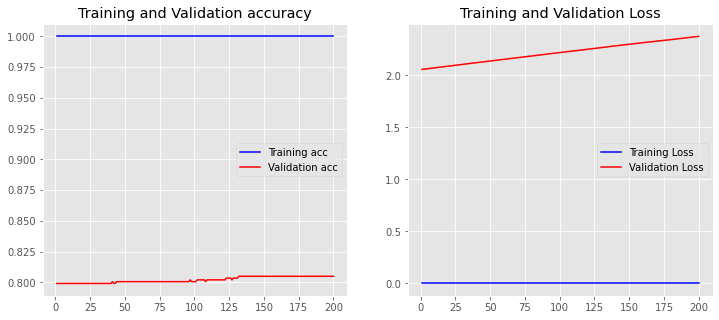

In [63]:
plot_history(history)